In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from factor_analyzer import FactorAnalyzer

In [2]:
df=pd.read_csv(r"C:\Users\Preethi\Downloads\Hospital_Revised_FlatFiles_20161110\Timely and Effective Care - Hospital.csv",encoding='latin1')

In [3]:
df.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                    Condition Measure ID  \
0  Heart Attack or Chest Pain     AMI_7a   
1  Heart Attack or Chest Pain     AMI_8a   
2           Children's Asthma      CAC_3   
3        Emergency Department      ED_1b   
4        Emergency Department      ED_2b   

                                        Measure Name          Score  \
0  Fibrinolytic Therapy Received Within 30 Minute...  Not Available   
1  Primary PCI Received Within 90 Minutes of Hosp...             92   
2              Home Management Plan of Care Document  Not Available   
3                                                ED1            269   
4                                                ED2             68   

          Sample                                           Footnote  \
0  Not Available    7 - No cases met the criteria for this measure.   
1             24  3 - Results are based on a shorter time period...   
2  Not Available  5 - Results are not available for this reporti...   
3            535  2 - Data submitted were based on a sample of c...   
4            535  2 - Data submitted were based on a sample of c...   

  Measure Start Date Measure End Date  
0           1/1/2015       12/31/2015  
1           1/1/2015        9/30/2015  
2           1/1/2015       12/31/2015  
3           1/1/2015       12/31/2015  
4           1/1/2015       12/31/2015

In [4]:
df.shape

(207174, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
Provider ID           207174 non-null int64
Hospital Name         207174 non-null object
Address               207174 non-null object
City                  207174 non-null object
State                 207174 non-null object
ZIP Code              207174 non-null int64
County Name           206529 non-null object
Phone Number          207174 non-null int64
Condition             207174 non-null object
Measure ID            207174 non-null object
Measure Name          207174 non-null object
Score                 207174 non-null object
Sample                202356 non-null object
Footnote              160185 non-null object
Measure Start Date    207174 non-null object
Measure End Date      207174 non-null object
dtypes: int64(3), object(13)
memory usage: 25.3+ MB


In [6]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID            0.00
Hospital Name          0.00
Address                0.00
City                   0.00
State                  0.00
ZIP Code               0.00
County Name            0.31
Phone Number           0.00
Condition              0.00
Measure ID             0.00
Measure Name           0.00
Score                  0.00
Sample                 2.33
Footnote              22.68
Measure Start Date     0.00
Measure End Date       0.00
dtype: float64

## Dropping columns having more than 50% null values and eliminating rows having null values

In [7]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(207174, 16)

In [8]:
#df=df.dropna(axis=0, how='any')

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
Provider ID           207174 non-null int64
Hospital Name         207174 non-null object
Address               207174 non-null object
City                  207174 non-null object
State                 207174 non-null object
ZIP Code              207174 non-null int64
County Name           206529 non-null object
Phone Number          207174 non-null int64
Condition             207174 non-null object
Measure ID            207174 non-null object
Measure Name          207174 non-null object
Score                 207174 non-null object
Sample                202356 non-null object
Footnote              160185 non-null object
Measure Start Date    207174 non-null object
Measure End Date      207174 non-null object
dtypes: int64(3), object(13)
memory usage: 25.3+ MB


In [10]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207174 entries, 0 to 207173
Data columns (total 16 columns):
Provider ID           207174 non-null int64
Hospital Name         207174 non-null object
Address               207174 non-null object
City                  207174 non-null object
State                 207174 non-null object
ZIP Code              207174 non-null int64
County Name           206529 non-null object
Phone Number          207174 non-null int64
Condition             207174 non-null object
Measure ID            207174 non-null object
Measure Name          207174 non-null object
Score                 207174 non-null object
Sample                202356 non-null object
Footnote              160185 non-null object
Measure Start Date    207174 non-null object
Measure End Date      207174 non-null object
dtypes: int64(3), object(13)
memory usage: 26.9+ MB


In [11]:
df=df[~(df["Score"].isin(['Not Applicable','Not Available']))]

In [12]:
df=df.drop(["Address","City","State","Phone Number","Condition","Hospital Name","ZIP Code","County Name",
            "Sample","Footnote"],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78150 entries, 1 to 207139
Data columns (total 6 columns):
Provider ID           78150 non-null int64
Measure ID            78150 non-null object
Measure Name          78150 non-null object
Score                 78150 non-null object
Measure Start Date    78150 non-null object
Measure End Date      78150 non-null object
dtypes: int64(1), object(5)
memory usage: 4.2+ MB


In [14]:
df['Measure ID'].unique()

array(['AMI_8a', 'ED_1b', 'ED_2b', 'EDV', 'HF_2', 'IMM_2',
       'IMM_3_OP_27_FAC_ADHPCT', 'OP_18b', 'OP_20', 'OP_21', 'OP_22',
       'OP_30', 'PC_01', 'PN_6', 'SCIP_CARD_2', 'SCIP_INF_1',
       'SCIP_INF_2', 'SCIP_INF_3', 'SCIP_INF_9', 'SCIP_VTE_2', 'STK_1',
       'STK_10', 'STK_2', 'STK_4', 'STK_5', 'STK_6', 'STK_8', 'VTE_1',
       'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'OP_23', 'OP_29', 'OP_4',
       'OP_5', 'STK_3', 'VTE_4', 'OP_3b', 'OP_1', 'OP_2', 'CAC_3',
       'AMI_7a'], dtype=object)

In [15]:
df = df.replace(['Not Available','Not Applicable'],0)

In [16]:
#df[df['Measure ID']== 'ED_1b' or 'ED_2b']
TimelinessOfCare_df = df[df['Measure ID'].isin(['ED_1b', 'ED_2b','OP_20','OP_5','OP_21' ,'OP_18b' ,'OP_3b'])]

In [17]:
EffectivenessOfCare_df = df[df['Measure ID'].isin(['IMM_2','IMM_3_OP_27_FAC_ADHPCT','OP_4','VTE_1','VTE_3','VTE_2',
                                                   'OP_22','OP_23','OP_29','OP_30','PC_01','VTE_6','STK_4','VTE_5',
                                                   'STK_8','STK_6','STK_1','CAC_3'])]


In [18]:
TimelinessOfCare_df["Score"] = TimelinessOfCare_df["Score"].apply(pd.to_numeric,errors='coerce')
EffectivenessOfCare_df["Score"] = EffectivenessOfCare_df["Score"].apply(pd.to_numeric,errors='coerce')


C:\Users\Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
EffectivenessOfCare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43700 entries, 7 to 207139
Data columns (total 6 columns):
Provider ID           43700 non-null int64
Measure ID            43700 non-null object
Measure Name          43700 non-null object
Score                 43700 non-null int64
Measure Start Date    43700 non-null object
Measure End Date      43700 non-null object
dtypes: int64(2), object(4)
memory usage: 2.3+ MB


In [20]:
EffectivenessOfCare_df=EffectivenessOfCare_df.drop(["Measure Start Date","Measure End Date","Measure Name"],axis=1)
TimelinessOfCare_df=TimelinessOfCare_df.drop(["Measure Start Date","Measure End Date","Measure Name"],axis=1)

In [21]:
EffectivenessOfCare_df=EffectivenessOfCare_df.pivot_table(values= 'Score', index= 'Provider ID', columns= 'Measure ID')
EffectivenessOfCare_df.reset_index(inplace=True)
EffectivenessOfCare_df = EffectivenessOfCare_df.rename_axis(None)
EffectivenessOfCare_df.head()

TimelinessOfCare_df=TimelinessOfCare_df.pivot_table(values= 'Score', index= 'Provider ID', columns= 'Measure ID')
TimelinessOfCare_df.reset_index(inplace=True)
TimelinessOfCare_df = TimelinessOfCare_df.rename_axis(None)
TimelinessOfCare_df.head()

Measure ID  Provider ID  ED_1b  ED_2b  OP_18b  OP_20  OP_21  OP_3b  OP_5
0                 10001  269.0   68.0   196.0   65.0   99.0    NaN   NaN
1                 10005  243.0   71.0   117.0   27.0   60.0    NaN  12.0
2                 10006  217.0   78.0   133.0   10.0   58.0    NaN   NaN
3                 10007  219.0   68.0   119.0   38.0   90.0    NaN   7.0
4                 10008  180.0   56.0    98.0   27.0   49.0    NaN   NaN

In [22]:
print(round((EffectivenessOfCare_df.isnull().sum()/EffectivenessOfCare_df.isnull().count())*100,2))
print(round((TimelinessOfCare_df.isnull().sum()/TimelinessOfCare_df.isnull().count())*100,2))

Measure ID
Provider ID                0.00
CAC_3                     96.00
IMM_2                     13.51
IMM_3_OP_27_FAC_ADHPCT     6.13
OP_22                     25.14
OP_23                     72.34
OP_29                     37.58
OP_30                     39.95
OP_4                      49.28
PC_01                     42.35
STK_1                     38.74
STK_4                     79.45
STK_6                     41.05
STK_8                     45.97
VTE_1                     17.30
VTE_2                     32.91
VTE_3                     43.18
VTE_5                     49.01
VTE_6                     71.25
dtype: float64
Measure ID
Provider ID     0.00
ED_1b           8.89
ED_2b           9.30
OP_18b          9.20
OP_20           8.92
OP_21          16.06
OP_3b          90.04
OP_5           43.15
dtype: float64


In [23]:
TimelinessOfCare_df.fillna(0, inplace=True)
EffectivenessOfCare_df.fillna(0, inplace=True)

In [24]:
print(round((TimelinessOfCare_df.isnull().sum()/TimelinessOfCare_df.isnull().count())*100,2))
TimelinessOfCare_df_copy= TimelinessOfCare_df.copy()
EffectivenessOfCare_df_copy= EffectivenessOfCare_df.copy()
print(round((EffectivenessOfCare_df.isnull().sum()/EffectivenessOfCare_df.isnull().count())*100,2))

Measure ID
Provider ID    0.0
ED_1b          0.0
ED_2b          0.0
OP_18b         0.0
OP_20          0.0
OP_21          0.0
OP_3b          0.0
OP_5           0.0
dtype: float64
Measure ID
Provider ID               0.0
CAC_3                     0.0
IMM_2                     0.0
IMM_3_OP_27_FAC_ADHPCT    0.0
OP_22                     0.0
OP_23                     0.0
OP_29                     0.0
OP_30                     0.0
OP_4                      0.0
PC_01                     0.0
STK_1                     0.0
STK_4                     0.0
STK_6                     0.0
STK_8                     0.0
VTE_1                     0.0
VTE_2                     0.0
VTE_3                     0.0
VTE_5                     0.0
VTE_6                     0.0
dtype: float64


In [25]:
TimelinessOfCare_df_copy.to_csv('TimelinessOfCare_clustering.csv')
EffectivenessOfCare_df_copy.to_csv('EffectivenessOfCare_clustering.csv')

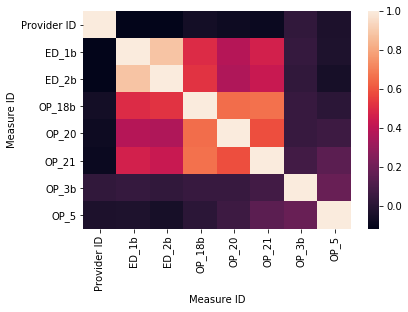

In [26]:
sns.heatmap(TimelinessOfCare_df.corr())

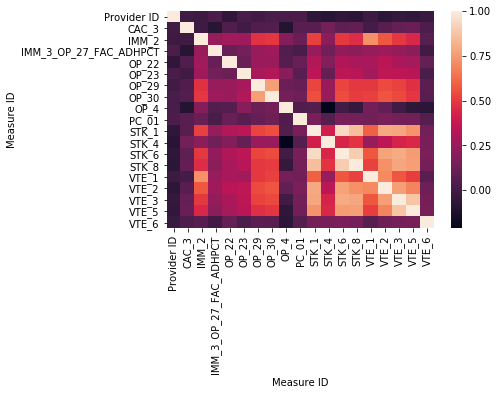

In [27]:
sns.heatmap(EffectivenessOfCare_df.corr())

In [28]:
EffectivenessOfCare_meandf= EffectivenessOfCare_df_copy.drop(['Provider ID'],axis=1,inplace=True)
TimelinessOfCare_meandf= TimelinessOfCare_df_copy.drop(['Provider ID'],axis=1,inplace=True)

In [29]:
#Let's check the eigenvalues route as well to find the number of factors
# Create factor analysis object and perform factor analysis with the number of factors equal to the number of columns
fa_EffectivenessOfCare = FactorAnalyzer(rotation = 'varimax',n_factors=1)
fa_EffectivenessOfCare.fit(EffectivenessOfCare_df_copy)
fa_EffectivenessOfCare.loadings_

C:\Users\Preethi\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:626: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


array([[0.08196554],
       [0.63192619],
       [0.29660839],
       [0.36905913],
       [0.40176165],
       [0.65310196],
       [0.67424901],
       [0.06317357],
       [0.17632089],
       [0.90482811],
       [0.4477114 ],
       [0.90958567],
       [0.86616998],
       [0.70669309],
       [0.86883457],
       [0.87760181],
       [0.82056443],
       [0.1559351 ]])

In [30]:
fa_TimelinessOfCare = FactorAnalyzer(rotation = 'varimax',n_factors=1)
fa_TimelinessOfCare.fit(TimelinessOfCare_df_copy)
fa_TimelinessOfCare.loadings_

C:\Users\Preethi\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:626: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


array([[-0.76452877],
       [-0.75570603],
       [-0.80174598],
       [-0.65679179],
       [-0.72373861],
       [-0.06903593],
       [-0.04045074]])

In [31]:
EffectivenessOfCare_meandf= pd.DataFrame(EffectivenessOfCare_df_copy.mean())
EffectivenessOfCare_meandf['index1'] = EffectivenessOfCare_meandf.index

TimelinessOfCare_meandf= pd.DataFrame(TimelinessOfCare_df_copy.mean())
TimelinessOfCare_meandf['index1'] = TimelinessOfCare_meandf.index

In [32]:
EffectivenessOfCare_meandf = EffectivenessOfCare_meandf.rename_axis(None)
EffectivenessOfCare_meandf.rename(columns={'index1':'Measures',0:'mean'},inplace=True)
EffectivenessOfCare_meandf

TimelinessOfCare_meandf = TimelinessOfCare_meandf.rename_axis(None)
TimelinessOfCare_meandf.rename(columns={'index1':'Measures',0:'mean'},inplace=True)
TimelinessOfCare_meandf

mean Measures
ED_1b   253.459083    ED_1b
ED_2b    92.062579    ED_2b
OP_18b  129.717760   OP_18b
OP_20    23.875348    OP_20
OP_21    44.730175    OP_21
OP_3b     5.834305    OP_3b
OP_5      4.712186     OP_5

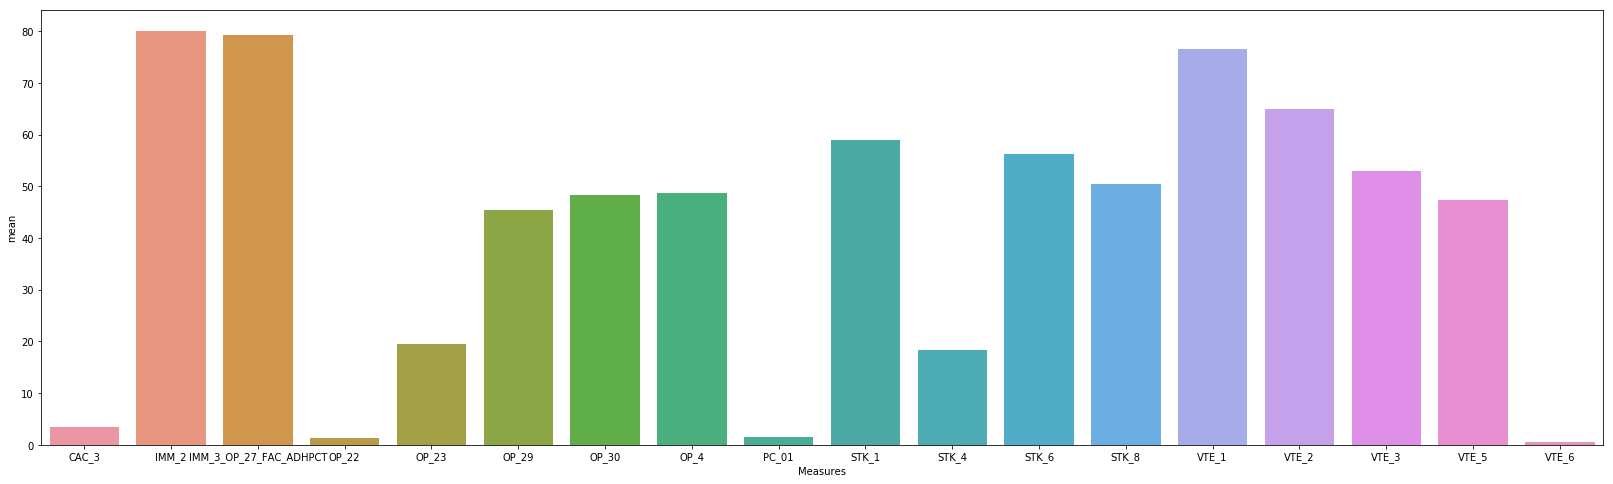

In [33]:
plt.figure(figsize=(28, 8))
ax = sns.barplot(y='mean', x='Measures', data=EffectivenessOfCare_meandf)

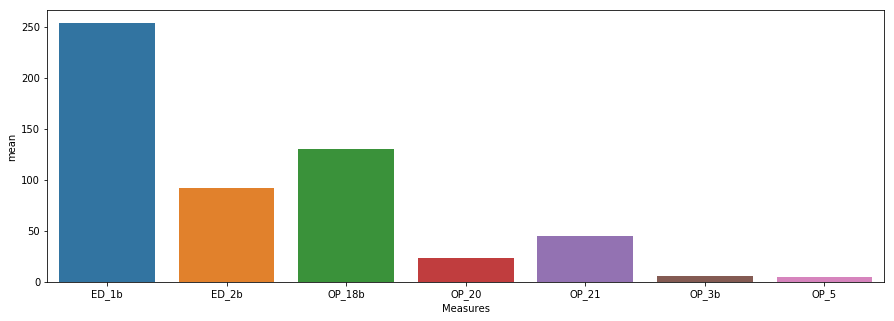

In [34]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(y='mean', x='Measures', data=TimelinessOfCare_meandf)

In [35]:
def factor_loading_weights(factors_list):
    sum_loadings = sum(factors_list)
    factor_weights = []
    for i in factors_list:
        factor = [round(((100/sum_loadings)*i)/100,2)]
        factor_weights.append(factor)
    return factor_weights

In [36]:
factors_list= [0.84,0.78,0.76,0.53,0.43,0.18,0.2]

weights = factor_loading_weights(factors_list)
weights

[[0.23], [0.21], [0.2], [0.14], [0.12], [0.05], [0.05]]

In [37]:
# multiplying measure scores with respective weigts(loading coefficients)
TimelinessOfCare_df['ED_1b'] = TimelinessOfCare_df['ED_1b']*0.23
TimelinessOfCare_df['ED_2b']= TimelinessOfCare_df['ED_2b']*0.21
TimelinessOfCare_df['OP_18b']= TimelinessOfCare_df['OP_18b']*0.2
TimelinessOfCare_df['OP_20']= TimelinessOfCare_df['OP_20']*0.14
TimelinessOfCare_df['OP_21']= TimelinessOfCare_df['OP_21']*0.12
TimelinessOfCare_df['OP_3b']= TimelinessOfCare_df['OP_3b']*0.05
TimelinessOfCare_df['OP_5']= TimelinessOfCare_df['OP_5']*0.05



In [38]:
# Average of the weighted scores to calculated group score.
TimelinessOfCare_df['TimelinessOfCare_score'] = ((TimelinessOfCare_df['ED_1b']+
                                                  TimelinessOfCare_df['ED_2b']+TimelinessOfCare_df['OP_18b']+
                                                  TimelinessOfCare_df['OP_20']+TimelinessOfCare_df['OP_21']+
                                                  TimelinessOfCare_df['OP_3b']+TimelinessOfCare_df['OP_5'])/7)

In [39]:
factors_list= [0.41,0.17,0.23,0.44,0.32,0.4,0.38,0.26,0.66,
               0.58,0.55,0.57,0.53,0.67,0.48,0.41,0.54,0.46]

weights = factor_loading_weights(factors_list)
weights

[[0.05],
 [0.02],
 [0.03],
 [0.05],
 [0.04],
 [0.05],
 [0.05],
 [0.03],
 [0.08],
 [0.07],
 [0.07],
 [0.07],
 [0.07],
 [0.08],
 [0.06],
 [0.05],
 [0.07],
 [0.06]]

In [40]:
# multiplying measure scores with respective weigts(loading coefficients)
EffectivenessOfCare_df['IMM_2'] = EffectivenessOfCare_df['IMM_2']*0.05
EffectivenessOfCare_df['IMM_3_OP_27_FAC_ADHPCT']= EffectivenessOfCare_df['IMM_3_OP_27_FAC_ADHPCT']*0.02
EffectivenessOfCare_df['OP_22']= EffectivenessOfCare_df['OP_22']*0.03
EffectivenessOfCare_df['OP_23']= EffectivenessOfCare_df['OP_23']*0.05
EffectivenessOfCare_df['OP_29']= EffectivenessOfCare_df['OP_29']*0.04
EffectivenessOfCare_df['OP_30']= EffectivenessOfCare_df['OP_30']*0.05
EffectivenessOfCare_df['OP_4']= EffectivenessOfCare_df['OP_4']*0.05
EffectivenessOfCare_df['PC_01']= EffectivenessOfCare_df['PC_01']*0.03
EffectivenessOfCare_df['STK_4']= EffectivenessOfCare_df['STK_4']*0.08
EffectivenessOfCare_df['VTE_5']= EffectivenessOfCare_df['VTE_5']*0.07
EffectivenessOfCare_df['VTE_6']= EffectivenessOfCare_df['VTE_6']*0.07
EffectivenessOfCare_df['VTE_1']= EffectivenessOfCare_df['VTE_1']*0.07
EffectivenessOfCare_df['VTE_3']= EffectivenessOfCare_df['VTE_3']*0.07
EffectivenessOfCare_df['VTE_2']= EffectivenessOfCare_df['VTE_2']*0.08
EffectivenessOfCare_df['STK_8']= EffectivenessOfCare_df['STK_8']*0.06
EffectivenessOfCare_df['STK_6']= EffectivenessOfCare_df['STK_6']*0.05
EffectivenessOfCare_df['STK_1']= EffectivenessOfCare_df['STK_1']*0.07
EffectivenessOfCare_df['CAC_3']= EffectivenessOfCare_df['CAC_3']*0.06



In [41]:
# Average of the weighted scores to calculated group score.
EffectivenessOfCare_df['EffectivenessOfCare_score'] = ((EffectivenessOfCare_df['IMM_2']+
                                                     EffectivenessOfCare_df['IMM_3_OP_27_FAC_ADHPCT']+
                                                     EffectivenessOfCare_df['OP_22']+
                                                     EffectivenessOfCare_df['OP_23']+EffectivenessOfCare_df['OP_29']+
                                                     EffectivenessOfCare_df['OP_30']+EffectivenessOfCare_df['OP_4']+
                                                     EffectivenessOfCare_df['PC_01']+EffectivenessOfCare_df['STK_4']+
                                                     EffectivenessOfCare_df['VTE_5']+EffectivenessOfCare_df['VTE_6']+
                                                     EffectivenessOfCare_df['VTE_1']+EffectivenessOfCare_df['VTE_3']+
                                                     EffectivenessOfCare_df['VTE_2']+EffectivenessOfCare_df['STK_8']+
                                                     EffectivenessOfCare_df['STK_6']+EffectivenessOfCare_df['STK_1']+
                                                     EffectivenessOfCare_df['CAC_3'])/18)

In [42]:
print(EffectivenessOfCare_df.head())
print(TimelinessOfCare_df.head())

Measure ID  Provider ID  CAC_3  IMM_2  IMM_3_OP_27_FAC_ADHPCT  OP_22  OP_23  \
0                 10001    0.0   4.85                    1.62   0.12    0.0   
1                 10005    0.0   4.95                    1.66   0.06    4.3   
2                 10006    0.0   5.00                    1.74   0.03    0.0   
3                 10007    0.0   4.95                    1.06   0.03    0.0   
4                 10008    0.0   4.75                    0.86   0.03    0.0   

Measure ID  OP_29  OP_30  OP_4  PC_01  STK_1  STK_4  STK_6  STK_8  VTE_1  \
0            0.00   4.10  0.00   0.00   6.93   5.36   4.95   5.22   6.79   
1            3.68   4.60  4.95   0.03   6.86   0.00   4.40   6.00   6.65   
2            2.80   4.40  0.00   0.00   6.93   0.00   4.85   5.40   6.86   
3            0.00   0.00  4.45   0.00   5.60   0.00   3.55   0.00   6.79   
4            3.84   4.85  0.00   0.00   0.00   0.00   0.00   0.00   6.93   

Measure ID  VTE_2  VTE_3  VTE_5  VTE_6  EffectivenessOfCare_score  


In [43]:
EffectivenessOfCare_df.to_csv('EffectivenessOfCare_supervised_model.csv')
TimelinessOfCare_df.to_csv('TimelinessOfCare_supervised_model.csv')